<a href="https://colab.research.google.com/github/Elianaribs/Portifolio-data-analytics/blob/main/Probabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Você é uma pesquisadora desenvolvendo uma análise sobre as características da força de trabalho nos estados brasileiros. Responda as perguntas abaixo:


##Importação de bibliotecas e arquivos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom
from scipy import stats

In [ ]:
df = pd.read_csv('populacao_brasileira.csv.csv')
df.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


##1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.


In [ ]:
# Filtrar fluentes em inglês
quant_pessoas = len(df)
fluencia_ingles = df[df['nível de proficiência em inglês'] == 'Avançado'].shape[0]

# Calculo probsbilidade complementar
probabilidade_fluencia = fluencia_ingles / quant_pessoas
complementar = (1 - probabilidade_fluencia) * 100
print(f'A probabilidade complementar é de {complementar:.2f}%')

A probabilidade complementar é de 65.60%


##2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [ ]:
# Filtrar pessoas de Alagoas ou Pará
alagoas_para =  df[(df['estado'] == 'AL') | (df['estado'] == 'PA')]

# Filtrar quantas pessoas de Alagoas ou Pará tem denda maior que 5k
renda_superior_5k = alagoas_para[alagoas_para['renda'] > 5000].shape[0]

# Calculo probabilidade
probabilidade = (renda_superior_5k / len(alagoas_para)) * 100
print(f'A probabilidade de uma pessoa de Alagoas ou Pará ter uma renda superior a 5 mil reais é de {probabilidade:.2f}%')

A probabilidade de uma pessoa de Alagoas ou Pará ter uma renda superior a 5 mil reais é de 5.06%


##3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?


In [ ]:
# Filtrar todos os amazonenses
amazonenses = df[df['estado'] == 'AM']

# Filtrar Amazonenses com ensino superior
sup_amazonas = df[(df['estado'] == 'AM') & (df['escolaridade'].isin(['Superior', 'Pós-graduação']))].shape[0]

# Probabilidade de um amazonense com ensino superior
probabilidade = (sup_amazonas / len(amazonenses)) * 100

# Probabilidade do quinto amazonense ter ensino superior
prob_5_pessoa = stats.geom.pmf(k= 5, p=probabilidade/100) * 100

print(f'A probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas é de {prob_5_pessoa:.2f}%')

A probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas é de 2.21%


##4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?


In [ ]:
# Criar faixas de renda
df['faixa_renda'] = pd.cut(df['renda'], bins=np.arange(0, df['renda'].max() + 1500, 1500))

# Contar a quantidade de pessoas em cada faixa de renda
contagem_faixas = df['faixa_renda'].value_counts()

# Encontrar a faixa com maior quantidade de pessoas
faixa_mais_frequente = contagem_faixas.idxmax()

print(f'A maioria das pessoas brasileiras possui renda na faixa: {faixa_mais_frequente}')

A maioria das pessoas brasileiras possui renda na faixa: (3000.0, 4500.0]


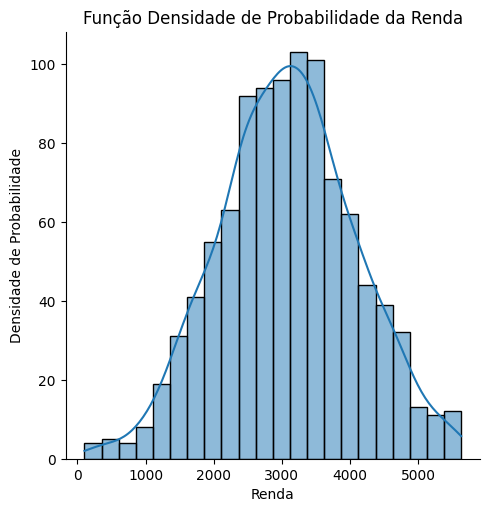

In [ ]:
# Plotar a função densidade de probabilidade
sns.displot(df['renda'], kde=True)
plt.title('Função Densidade de Probabilidade da Renda')
plt.xlabel('Renda')
plt.ylabel('Densidade de Probabilidade')
plt.show()

##5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.


In [ ]:
# Calcular a média e a variância da renda
media_renda = df['renda'].mean()
variancia_renda = df['renda'].var()

print(f'A média da renda da amostra é: {media_renda:.2f}')
print(f'A variância da renda da amostra é: {variancia_renda:.2f}')

A média da renda da amostra é: 3082.54
A variância da renda da amostra é: 993156.23


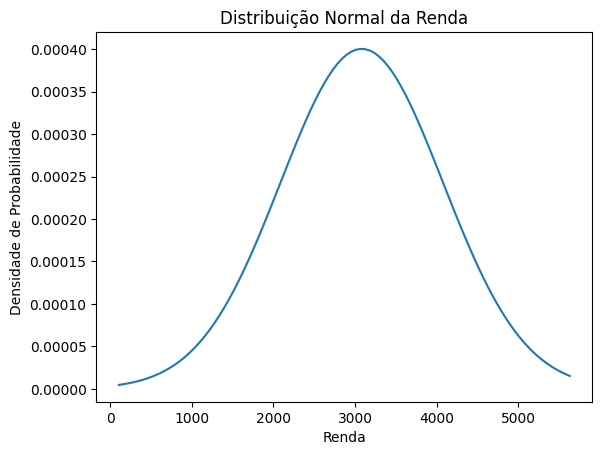

In [ ]:
# Criar a distribuição normal
x = np.linspace(df['renda'].min(), df['renda'].max(), 100)
y = norm.pdf(x, loc=media_renda, scale=np.sqrt(variancia_renda))

# Plotar o gráfico da distribuição normal
plt.plot(x, y)
plt.xlabel('Renda')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição Normal da Renda')
plt.show()

##6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?


In [ ]:
# Filtrar pessoas com pós-graduação
pos_graduacao = df[df['escolaridade'] == 'Pós-graduação'].shape[0]

# Probabilidade de uma pessoa ter pós-graduação
probabilidade_pos_graduacao = pos_graduacao / len(df)

# Calcular a probabilidade de encontrarmos 243 mil pessoas com pós-graduação em uma amostra de 1 milhão
n = 1000000  # Tamanho da amostra
k = 243000  # Número de sucessos
p = probabilidade_pos_graduacao  # Probabilidade de sucesso

# Calcular a probabilidade usando a fórmula da distribuição binomial
probabilidade = binom.pmf(k, n, p)

print(f'A probabilidade de encontrarmos 243 mil pessoas com pós-graduação em uma amostra de 1 milhão é: {probabilidade:.6}')

A probabilidade de encontrarmos 243 mil pessoas com pós-graduação em uma amostra de 1 milhão é: 1.11049e-119


##7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

In [ ]:
# Calcular a frequência relativa de cada nível de escolaridade
freq_relativa = df['escolaridade'].value_counts(normalize=True)

# Criar a função de densidade acumulada (CDF)
cdf = freq_relativa.cumsum()

print("Função de Densidade Acumulada (CDF) para a coluna 'Escolaridade':")
print(cdf)


Função de Densidade Acumulada (CDF) para a coluna 'Escolaridade':
escolaridade
Fundamental      0.266
Pós-graduação    0.519
Superior         0.762
Médio            1.000
Name: proportion, dtype: float64


##8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?


In [ ]:
# Filtrar pessoas com nível de inglês intermediário
ingles_intermediario = df[df['nível de proficiência em inglês'] == 'Intermediário'].shape[0]

# Proporção de pessoas com nível de inglês intermediário
proporcao_intermediario = ingles_intermediario / len(df)

# Nível de confiança (95%)
nivel_confianca = 0.95

# Calcular o z-score para o nível de confiança desejado
z_score = stats.norm.ppf((1 + nivel_confianca) / 2)

# Calcular a margem de erro
margem_erro = z_score * np.sqrt((proporcao_intermediario * (1 - proporcao_intermediario)) / len(df))

print(f"A margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário é: {margem_erro:.4f}")


A margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário é: 0.0291


##9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [ ]:
# Calcular a média da renda
media_renda = df['renda'].mean()

# Filtrar pessoas com renda 1000 reais superior à média
pessoas_acima_media = df[df['renda'] > (media_renda + 1000)].shape[0]

# Probabilidade de uma pessoa ter renda 1000 reais superior à média
probabilidade_acima_media = pessoas_acima_media / len(df)

probabilidade_acima_media

# Calcular a probabilidade de encontrar 60 pessoas com renda 1000 reais superior à média
n = len(df)  # Tamanho da amostra
k = 60  # Número de sucessos
p = probabilidade_acima_media  # Probabilidade de sucesso

# Calcular a probabilidade usando a fórmula da distribuição binomial
probabilidade = binom.pmf(k, n, p)

print(f'A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média é: {probabilidade}')

A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média é: 1.099520565163774e-22


##10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

In [ ]:
# filtrar características
sud = df[df['estado'] == 'SE']
sud_homem = sud[sud['sexo'] == 'M']
sud_homem_fund = sud_homem[sud_homem['escolaridade'] == 'Fundamental']
sud_homem_fund_2k = sud_homem_fund[sud_homem_fund['renda'] > 2000]

# Calcular probabilidade
probabilidade = len(sud_homem_fund_2k) / len(sud)
print(f'A probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é de {probabilidade:.2f}%')

A probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é de 0.12%
